In [1]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_2/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_2/after'
pcap_dir_list = sorted(os.listdir(before_path))

import statistics


In [31]:
# MRB
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    if pcap_dir == "equinix-sanjose.dirA.20140320-130600.UTC.anon.pcap":
        continue
    for inst_name in ["inst2", "inst3"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.3705563708879213, 1.063391683543661, 0.40907517543031563, 1.1315300742870837, 0.21982180019639816, 1.3684925642600554, 1.7608014604791635, 0.3861782215642423, 1.0272319144489843, 1.241652754590985, 1.0249425619436763, 0.13257465278698435, 0.015982573075875785, 0.474797736164394, 0.18020270648945297, 1.96742712934914, 0.10267225351721843, 2.533383785367283, 1.4066882569792285, 1.8253088899385088, 0.9482637730356529, 0.17212698119310568, 0.5711517529275265, 0.6121763037542532, 0.6541316915225057, 1.0267847859088735, 0.9464744269324098, 1.3570222164479668, 0.38337926514367837, 0.8323733262827898, 1.0987180754997838, 2.6800554414902487, 1.1916063770583036, 0.35174749892543505, 1.4922417573091558, 0.5683507913954334, 1.7510442149557726, 1.0896893115352049, 1.6475939830658113, 1.5363851411819909, 0.2672079759676085, 0.814488367466284, 0.8957116456003561, 0.15932486090192807, 0.5668762034482928]
[0.10142767131287364, 0.8816997779244943, 0.010563008344776593, 0.824334709205137, 0.1220811405

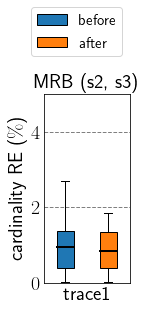

In [32]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRB (s2, s3)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrb.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [33]:
# Entropy
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if pcap_dir == "equinix-sanjose.dirA.20140320-130600.UTC.anon.pcap":
        continue
    for inst_name in ["inst4", "inst5"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[4.147204942003283, 5.329925040437089, 7.386380383408593, 20.198436376146027, 3.710759337370448, 5.6644929926599605, 7.0117496398314065, 20.1737995230205, 4.368548486634015, 5.283198145438022, 6.373658446088617, 20.26232194729181, 3.5653072758752713, 5.242284967350269, 6.580113047565458, 19.958719001030616, 3.8701667843770986, 5.745493075168262, 7.0378596614982385, 20.21852545866879, 4.7704545288191476, 5.942937792745446, 7.471801250614418, 21.004336107507516, 7.3673471965432595, 6.263536843157852, 5.2126790895920605, 22.220695594771072, 0.9547948336301036, 2.3793049680927276, 4.591636476632318, 17.965755763653156, 1.290072079299791, 1.6591636801028127, 3.026593524512916, 17.84032479686139]
[4.963308252544464, 6.523633741574727, 7.1714376562083375, 21.24794099754671, 5.032357631470232, 6.6178436258381295, 7.177281575951132, 21.38437856093099, 5.080103783505067, 6.688439332986121, 7.121465636397642, 21.306250888184668, 4.74217205071261, 6.79560941291919, 7.026027195024158, 21.4084989930

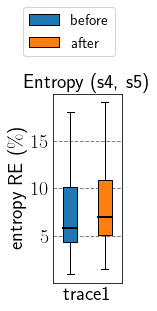

In [34]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("Entropy (s4, s5)", fontsize = 20)
plt.ylabel("entropy RE ($\%$)", fontsize = 20)
# plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("entropy.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [35]:
# MRAC
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if pcap_dir == "equinix-sanjose.dirA.20140320-130600.UTC.anon.pcap":
        continue
    for inst_name in ["inst9", "inst10"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)
print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.5140173061395203, 0.5190290092727323, 0.44542936932472954, 0.46405185817874645, 0.49648908293132665, 0.4636043332566158, 0.4660061612309091, 0.4647000598442495, 0.49230447204699423, 0.46962607538773304, 0.435141806508716, 0.5031498157273276, 0.5132560796563702, 0.4875850212079519, 0.44307023107473786, 0.4764789355251077, 0.5363321754562075, 0.4910042855758097, 0.4917679364990277, 0.45988369271674673, 0.5013718393403191, 0.45243518817277767, 0.4556000999770716, 0.46942829889385373, 0.5121729248439775, 0.45889200382267026, 0.4538929701007645, 0.48152454504091874, 0.47763292932009144, 0.44527566983425704, 0.46103751353342687, 0.45195450186701996, 0.5319523937513054, 0.43315963109849226, 0.46917363058694456, 0.4494087343527494]
[0.4912801145367902, 0.4890839399767377, 0.45171084199885736, 0.44075903165384367, 0.4921669555014741, 0.42935429039120937, 0.45133960772842513, 0.4336069515767539, 0.4709613779331319, 0.46036541958728366, 0.4224160144029041, 0.45808972459788233, 0.49000623209660

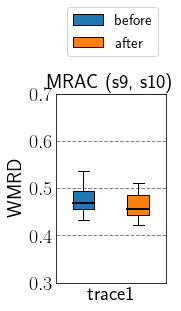

In [36]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRAC (s9, s10)", fontsize = 20)
plt.ylabel("WMRD", fontsize = 20)
plt.ylim([0.3, 0.7])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrac.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [37]:
# CM, CS, Kary
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if pcap_dir == "equinix-sanjose.dirA.20140320-130600.UTC.anon.pcap":
        continue
    # for inst_name in ["inst8"]:
    # for inst_name in ["inst6", "inst7"]:
    # for inst_name in ["inst6"]:
    for inst_name in ["inst6"]:
    # for inst_name in ["inst7"]:
    # for inst_name in ["inst6", "inst7", "inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[3.085940901456952, 3.3684545894397377, 4.147935071139895, 3.6495645688387297, 3.5773605279573535, 3.2225523274504617, 3.9027221406524744, 2.862560276517271, 4.2078140638336965, 3.8492103574467813, 4.273137165082816, 3.4069387293890845, 4.468337073680471, 4.072488572667773, 3.2223167638987458, 3.1207689636512383, 4.566634643475929, 2.6110895675766725]
[2.4907299499116538, 2.9964392854490285, 3.765026350121868, 3.0229417068102498, 2.6920335692807287, 2.666001090013881, 3.652598187207808, 2.5056319859311724, 3.385255599006476, 3.268821705501188, 3.4752193136303053, 2.618930432427569, 3.8732331064682923, 3.2278200100957974, 2.802436578750282, 3.1107348475913534, 3.902427071325896, 2.161032394844988]
18 3.613462548398042
18 3.0668382772008016


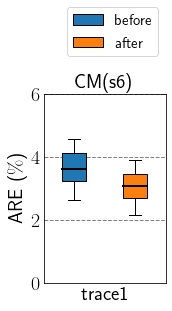

In [38]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CM(s6)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("CM.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [2]:
# CM, CS, Kary
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if pcap_dir == "equinix-sanjose.dirA.20140320-130600.UTC.anon.pcap":
        continue
    # for inst_name in ["inst8"]:
    # for inst_name in ["inst6", "inst7"]:
    # for inst_name in ["inst6"]:
    # for inst_name in ["inst6"]:
    for inst_name in ["inst7"]:
    # for inst_name in ["inst6", "inst7", "inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.9070340996173275, 0.551716319567944, 0.61234919423462, 0.38489625045064313, 0.48399905451400715, 0.6660135539057763, 0.8947657480423231, 0.6101303743490625, 0.7844483517575757, 0.7568650043374586, 0.6213537345824066, 0.4701854926132797, 0.8223642745773542, 0.48184900549868925, 0.5165702096364763, 0.928262487132032, 0.611876687659746, 0.7360113178590224, 0.5661115494196466, 0.6941428074293077, 0.7695427346356325, 0.7507247864157219, 0.6435984626241098, 0.689505120445326, 0.8435168810056066, 0.8053274830721685, 0.7161609478957008, 0.7362927704403474, 0.9261813767953684, 0.7084827804466712, 0.9152716551727054, 0.7377700345355607, 0.5279753397137152, 0.6436035711194188, 0.7102293204663614, 0.816089622408984, 1.019796655156936, 0.9492004857417113, 0.7217271926668805, 0.7492278680677275, 0.6820484224480952, 0.834590119479296, 0.8192304081208455, 0.840615539264465, 0.7898859980414926, 0.824995879627917, 0.662280760812724, 0.8116070981740319, 0.8437345573397477, 0.6406419028692214, 0.699249

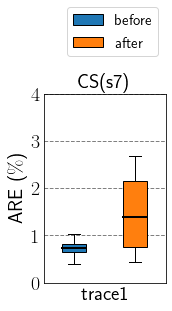

In [4]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CS(s7)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
plt.ylim([0, 4])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("CS.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [43]:
# CM, CS, Kary
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if pcap_dir == "equinix-sanjose.dirA.20140320-130600.UTC.anon.pcap":
        continue
    # for inst_name in ["inst8"]:
    # for inst_name in ["inst6", "inst7"]:
    # for inst_name in ["inst6"]:
    # for inst_name in ["inst6"]:
    for inst_name in ["inst8"]:
    # for inst_name in ["inst6", "inst7", "inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[5.89207739036473, 5.913844379900004, 5.635075953202251, 7.49421629786344, 6.141646608211311, 23.787284484769007, 10.623314076253083, 7.956592392142866, 2.873771665852694]
[2.5854641442068185, 2.3008133316255335, 1.6613772355854506, 3.8113984336455897, 2.8461147168267877, 2.5439865260799492, 3.685611358711366, 3.5428107690265622, 3.453598977939402]
9 6.141646608211311
9 2.8461147168267877


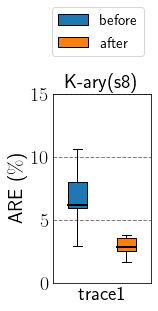

In [44]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("K-ary(s8)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
plt.ylim([0, 15])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("kary.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [46]:
# CM, CS, Kary
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if pcap_dir == "equinix-sanjose.dirA.20140320-130600.UTC.anon.pcap":
        continue
    # for inst_name in ["inst8"]:
    # for inst_name in ["inst6", "inst7"]:
    # for inst_name in ["inst6"]:
    # for inst_name in ["inst6"]:
    # for inst_name in ["inst7"]:
    for inst_name in ["inst6", "inst7", "inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "hf.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "hf.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)



[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (49, 1), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0)]
[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0),